Lab3: Wide data and linear models

Name: Gautami Kant
Andrew ID: gkant

Aim: Predict the disease UCEC (uterine corpus endometrial carcinoma). Labels (1/0) are encoding tumor grade “II-” vs. “III+”. Perform binary classification (0/1) using linear models

Specific tasks:
1.Classification performance using accuracy and F1-score:

-Obtained an F1-score of 88.88% on the validation set (public)

2.Develop a pipeline to try different linear models (linear regression, logistic regression, Ridge regression, LASSO, etc.)
Study the effect of regularization parameters on model performance. What model is the best?

-Developed a pipeline to train multiple linear models - logistic regression, linear regression, ridge regression, LASSO, linear SVC, preceptron and SGDClassifier. Of these, got the best results using logistic regression. Next, I used l1,l2,elastic net regularization on logistic regression model to check if that made any difference to the results. Result was the original model model with l2 got best results.'saga' solver since we can perform l1,l2,elastic net on this solver gave lower results than the default solver.


3.Random guessing: Y-randomization

-With Y-randomization, as expected the accuracy of the model was lower than without randomization. Got 49.77% accuracy which is much lower than actual accuracy obtained from the model.


4.Top important genes for the model decision

-Obtained top 20 genes according feature importance score from the best model logistic regression


5.Visualizing the dataset to check if we can separate two groups of patients visually

-Performed PCA on the training data set to see if we can visually separate the 2 groups of patients. No separation and almost all points are mixed and concentrated at the center. Additionally, performed PCA for the predicted test data labels as well, no separation here as well


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from pandas import DataFrame


In [12]:
 # Loading the csv files
X_train = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\train_X.csv")
y_train = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\train_y.csv")
X_test = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\test_X.csv")

In [13]:
# Checking for nulls. No nulls in the training and test data set
print("Nulls in X_train is ", X_train.isna().sum().sum())
print("Nulls in y_train is ", y_train.isna().sum().sum())
print("Nulls in X_test is ", X_test.isna().sum().sum())

#Checking for non-integer columns. Looks like only the identifier column has object data type
print("Non-numeric columns in X_train are", X_train.select_dtypes(include=['object']).columns.tolist())
print("Non-numeric columns in y_train are", y_train.select_dtypes(include=['object']).columns.tolist())
print("Non-numeric columns in X_test are", X_test.select_dtypes(include=['object']).columns.tolist())

Nulls in X_train is  0
Nulls in y_train is  0
Nulls in X_test is  0
Non-numeric columns in X_train are ['Unnamed: 0']
Non-numeric columns in y_train are ['Unnamed: 0']
Non-numeric columns in X_test are ['Unnamed: 0']


In [16]:
#Exploring the y_train data
y_train.info()
# Classes are not imbalanced. Overall % - 0 (43%) and 1 (57%)
print(y_train.groupby(['xml_neoplasm_histologic_grade']).count())

#Scaling the training and test data set
X_train_1 = X_train.iloc[:,1:]
scaler = preprocessing.StandardScaler().fit(X_train_1)
X_train_1 = pd.DataFrame(scaler.transform(X_train_1),columns= X_train_1.columns, index = X_train_1.index) 

X_test_1 = X_test.iloc[:,1:]
scaler = preprocessing.StandardScaler().fit(X_test_1)
X_test_1 = pd.DataFrame(scaler.transform(X_test_1),columns= X_test_1.columns, index = X_test_1.index) 


y_train_1 = y_train.iloc[:,1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     444 non-null    object
 1   xml_neoplasm_histologic_grade  444 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB
                               Unnamed: 0
xml_neoplasm_histologic_grade            
0                                     190
1                                     254


In [18]:
# Dropping low variance columns. No columns are dropped

thresholds = [0.1,0.2,0.3,0.4]
selector = VarianceThreshold(threshold = thresholds[2])
selection_columns = selector.fit_transform(X_train_1)
print(selection_columns.shape)

concol = [column for column in X_train_1.columns 
          if column not in X_train_1.columns[selector.get_support()]]
X_train_1 = X_train_1.drop(concol,axis=1)
print(X_train_1.shape)


(444, 17970)
(444, 17970)


In [125]:
# Running linear models to get the best result on training data with cross validation

pipe = Pipeline([('classifier', LogisticRegression(max_iter= 10000, random_state = 5))])
 
pipe.fit(X_train_1, y_train_1)

parameters = {'classifier': [LogisticRegression(max_iter= 10000, random_state = 10),
                             Ridge(random_state=10), 
                             LinearSVC(random_state=10), 
                             Lasso(random_state=10), 
                             Perceptron(random_state=10),
                             LinearRegression(),
                             SGDClassifier(random_state=10)]}

grid = GridSearchCV(pipe, parameters, cv=3).fit(X_train_1, y_train_1)

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

## Thus, out of the above linear models, logistic regression is the best model.

{'classifier': LogisticRegression(max_iter=10000, random_state=10)}
Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=10000, random_state=10))])


In [52]:
# From above, Logistic regression is the best model based on training data. Thus, we can check results with different
#regularization techniques

# Default solver 'lbfgs' with default parameters. This solver does not support all types of regularization
log_reg_0 = LogisticRegression(random_state=10,max_iter=10000)
log_reg_0.fit(X_train_1, y_train_1)
scores = cross_val_score(log_reg_0, X_train_1, y_train_1, cv=2)
print(scores.mean())

#The 'saga' solver supports l1,l2, elasticnet penalty. Thus tried combination of these parameters. The accuracy for the training dataset
# went down by about 3%. Thus, I have still considered the original logistic regression model (log_reg_0) to be the best model.

# Solver 'saga' with l1 regularization
log_reg = LogisticRegression(random_state=10,max_iter=10000, solver='saga', penalty = 'l1')
log_reg.fit(X_train_1, y_train_1)
scores = cross_val_score(log_reg, X_train_1, y_train_1, cv=2)
print(scores.mean())

# Solver 'saga' with l2 regularization
log_reg = LogisticRegression(random_state=10,max_iter=10000, solver='saga', penalty = 'l2' )
log_reg.fit(X_train_1, y_train_1)
scores = cross_val_score(log_reg, X_train_1, y_train_1, cv=2)
print(scores.mean())

# Solver 'saga' with l2 regularization
log_reg = LogisticRegression(random_state=10,max_iter=10000, solver='saga', penalty = 'elasticnet', l1_ratio= 0.5)
log_reg.fit(X_train_1, y_train_1)
scores = cross_val_score(log_reg, X_train_1, y_train_1, cv=2)
print(scores.mean())

0.822072072072072
0.7995495495495495
0.795045045045045
0.7972972972972974


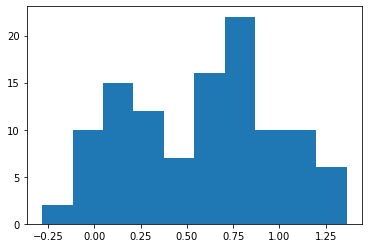

In [160]:
# Linear regression - converting continuous values to 0/1 labels and trying on test data - we get lower results than logistic regression
# Setting the threshold to 0.5. Can perform a sensitivity analysis with different thresholds to see if any particular threshold gives better
#accuracy

lin_reg = LinearRegression()
lin_reg.fit(X_train_1, y_train_1)

#Predicting the test set results
y_test = lin_reg.predict(X_test_1)
plt.hist(y_test, bins = 10)
# Setting the threshold to decide 0/1 classifier
y_test = np.where(y_test < 0.5, 0 , 1)

#Output to a csv file
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)


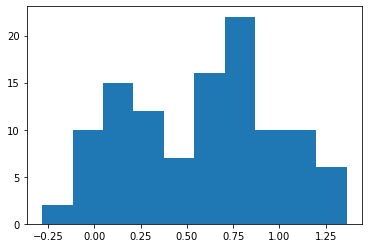

In [162]:
#Ridge regression  - converting continuous values to 0/1 labels  and trying on test data - we get lower results than logistic regression

rid_reg = Ridge(random_state=10)
rid_reg.fit(X_train_1, y_train_1)

#Predicting the test set results
y_test = rid_reg.predict(X_test_1)
plot_1 = plt.hist(y_test, bins = 10)
# Setting the threshold to decide 0/1 classifier
y_test = np.where(y_test < 0.5, 0 ,1)

#Output to a csv file
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)


In [ ]:
#Predicting the test data using the the best trained model (logistic regression)

y_test = log_reg_0.predict(X_test_1)

# Output to a csv file which is uploaded to kaggle
X_test_with_prediction = X_test
X_test_with_prediction['xml_neoplasm_histologic_grade'] = y_test
X_test_with_prediction_output =  X_test_with_prediction.iloc[:, [0, -1]]
X_test_with_prediction_output = X_test_with_prediction_output.rename(columns={'Unnamed: 0' : 'ID'})
X_test_with_prediction_output.to_csv(r'C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\HW 3\Output\X_test_with_prediction_output.csv',index=None, header=True)


In [84]:
## Using logistic regression (our best model) to obtain the top 20 metrics

model = log_reg_0
feature_df=pd.DataFrame({'feature':list(X_train_1.columns),'feat_imp':[abs(i) for i in model.coef_[0]]})
feature_df.sort_values('feat_imp',ascending=False)
feature_df['cumulative'] = 0

feature_df['cumulative'][0] = feature_df['cumulative'][0] + feature_df['feat_imp'][0]

for i in tqdm(range(1,len(feature_df))):
    feature_df['cumulative'][i] = feature_df['feat_imp'][i] + feature_df['cumulative'][i-1]

    
feature_df.head(20)

100%|██████████| 17969/17969 [00:00<00:00, 36408.29it/s]


,feature,feat_imp,cumulative
0,ENSG00000000003,0.003884,0.003884
1,ENSG00000000005,0.024082,0.027966
2,ENSG00000000419,0.009035,0.037000
3,ENSG00000000457,0.002549,0.039549
4,ENSG00000000938,0.001610,0.041159
5,ENSG00000000971,0.004449,0.045608
6,ENSG00000001036,0.003999,0.049608
7,ENSG00000001084,0.006312,0.055920
8,ENSG00000001167,0.007765,0.063685
9,ENSG00000001460,0.003687,0.067372


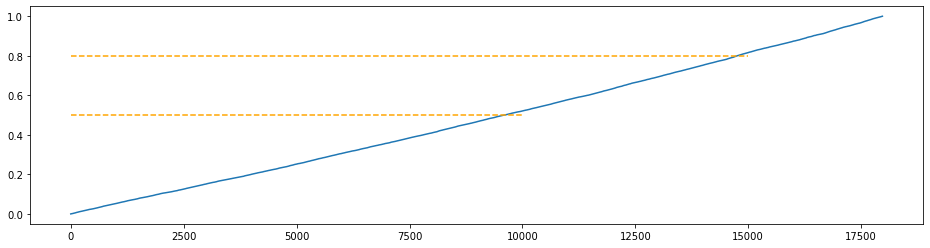

In [137]:
## Feature importance vs no. of features (using logistic regression)
# ~15000 features contribute to 80% feature importance

sum_imp = feature_df['feat_imp'].sum()
data = feature_df.cumulative
plt.figure(figsize = (16,4))
plt.plot(data/sum_imp)
plt.hlines(0.8,0,15000, label ="80% feature importance",linestyles = "dashed",color = 'orange')
plt.hlines(0.5,0,10000, label ="50% feature importance",linestyles = "dashed",color = 'orange')

In [154]:
## Selecting features that contribute to 80% of the feature importance for training the model. Accuracy of the trained model has not decreased
#significantly.

feature_select = list(feature_df['feature'].head(5000))

X_train_2 = X_train_1.copy()
X_train_2 = X_train_2.loc[:, feature_select]

log_reg_1 = LogisticRegression(random_state=10,max_iter=10000)
log_reg_1.fit(X_train_2, y_train_1)
scores = cross_val_score(log_reg_1, X_train_2, y_train_1, cv=2)
print(scores.mean())

0.7995495495495495


In [124]:
## Y- randomization - shuffled Y labels in the training data. Much lower accuracy than the true training data set. Shows that results
# are not random guesses

import random

random.seed(37)
l2 = list(y_train_1)
random.shuffle(l2)

log_reg_random = LogisticRegression(random_state=10,max_iter=10000)
log_reg_random.fit(X_train_1, l2)
scores_random = cross_val_score(log_reg_random, X_train_1, l2, cv=2)
print(scores_random.mean())

0.49774774774774777


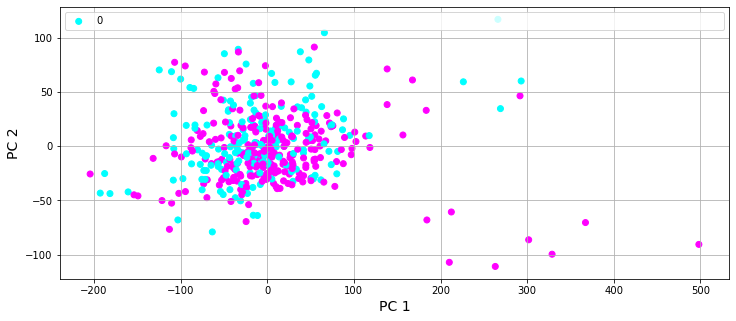

In [53]:
## Visualizing the training dataset using PCA - no clear separation

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca_function = pca.fit_transform(X_train_1)
pca_df = pd.DataFrame(data = pca_function, columns = ['PC 1', 'PC 2'])

target = y_train_1
fig = plt.figure(figsize = (12,5))
axis = fig.add_subplot(1,1,1) 
axis.set_xlabel('PC 1', fontsize = 14)
axis.set_ylabel('PC 2', fontsize = 14)
axis.scatter(pca_df['PC 1'], pca_df['PC 2'], c=list(target) ,cmap='cool')
plt.grid()
plt.legend(list(target), loc = 9, mode = 'expand', ncol=5)
plt.show()

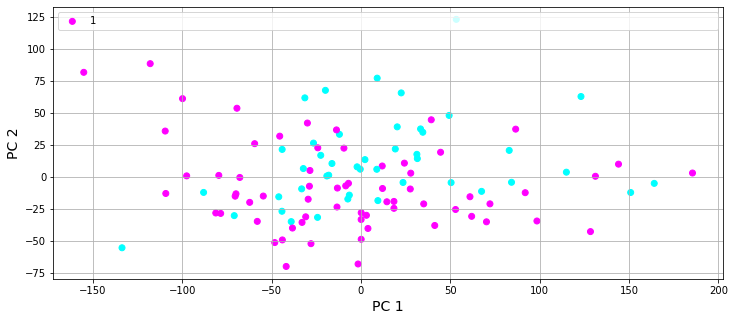

In [127]:
## Also trying it on the test data set. No separation here either

X_test_with_prediction_output

pca = PCA(n_components = 2)

pca_function = pca.fit_transform(X_test_1)
pca_df = pd.DataFrame(data = pca_function, columns = ['PC 1', 'PC 2'])

target = y_test
fig = plt.figure(figsize = (12,5))
axis = fig.add_subplot(1,1,1) 
axis.set_xlabel('PC 1', fontsize = 14)
axis.set_ylabel('PC 2', fontsize = 14)
axis.scatter(pca_df['PC 1'], pca_df['PC 2'], c=list(target) ,cmap='cool')
plt.grid()
plt.legend(list(target), loc = 0, mode = 'expand', ncol=2)
plt.show()